In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
import matplotlib.style as style
style.use('ggplot')

%matplotlib inline

In [70]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged_cleaned.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Search and Visualization of Term Occurrences:
This tool enables you to visualize changes in the frequency of term occurrences in this corpus over space and time.

Usage: Modify what's within the brackets next to the variable named "terms" below. Click on the cell below and press Shift + Return in order to run the cell (alternatively, click on the cell below and select Select Cell -> Run Cells in the menu above).

('Filtering for term:', ['slave'], '(225 total letters)')
First 5 rows of filtered dataframe:


,UID,Vol,LetterNo,Sender,Place Sent From,Ship Name,Place Going To,Date,Boat/Fort,RAC/Other Nation,text,Year,Month,text_cleaned,text_cleaned_dealiased,filtered
10,593,1,593,Andrew Brandfill,Aboard the Alexander,Alexander,Cape Coast Castle,23,Transatlantic Voyage,RAC,I thought convenient to give you a line concer...,1681.0,5.0,thought convenient give line concerning slave ...,thought convenient give line concerning slave ...,True
33,598,1,598,Samuel Rickard,Aboard the Unblessed Blessing,Unblessed Blessing,Cape Coast Castle,20,Transatlantic Voyage,RAC,Our number of Negroes are not much increased. ...,1681.0,8.0,number negroes much increased since came capo ...,number negroes much increased sinc came capo c...,True
45,399,1,399,Francis Franckland,Accra,NaN,Cape Coast Castle,06,Fort,RAC,Yours under the 31 May past received per Mr We...,1681.0,6.0,31 may past received per mr wendover take noti...,31 may past received per mr wendover take noti...,True
88,442,1,442,Ralph Hassell,Accra,NaN,Cape Coast Castle,26,Fort,RAC,Yours of the 19th instant have received and am...,1682.0,12.0,19th instant received much grieved notwithstan...,19th instant received much grieved notwithstan...,True
111,465,1,465,Robert Young,Accra,NaN,Cape Coast Castle,02,Fort,RAC,Your Worship and Councills letter dated of the...,1683.0,8.0,worship councills letter dated 26th july recei...,worship councills letter dated 26th july recei...,True


UIDs of letters containing the term:
[ 593  598  399  442  465  572 1367 1401 1423 1434 2838 2856 2933 2939
 2955 2975  518  562  568  579  613  523  525 1500  564  128  131  144
  149  154  178  197  199 1008 2147 2151 2152 2172 2175 2185 2187 2188
 2189 2191 2194 2195 2196 2214  293  299  300  301  302  309  333 1078
 1105 1115 1163 1167 1172 1175 1176 1188 1237 2308 2309 2310 2327 2332
 2335 2345 2354 2355 2357 2380 2383 2435 2436 2440 2448 2474 2493 2515
 2554  618  484  570  548  630 1670 1673 1674 1680 1681 1691 1692 1701
 1702 1704 1707 1711 1720 1722 1744 1757 1762 1764 1771 1252 1293 1325
 1335 1337 1343 1346 2580 2596 2598 2599 2602 2613 2636 2664 2665 3078
 2114   45   50   63   65   69   71   75  816  839  855  896  904  955
  498  507  543  478  480  483  492  487  490  637 1454 1457 1459 1463
 1464 1465 1561 2983 2985 2990 2992 1558 2693 2694  639   30   31  647
  675  678  679  691  692  694  705  709  710  711  774  775  778  781
 1555 1585 1788 1790 1814 1826 1845 1846

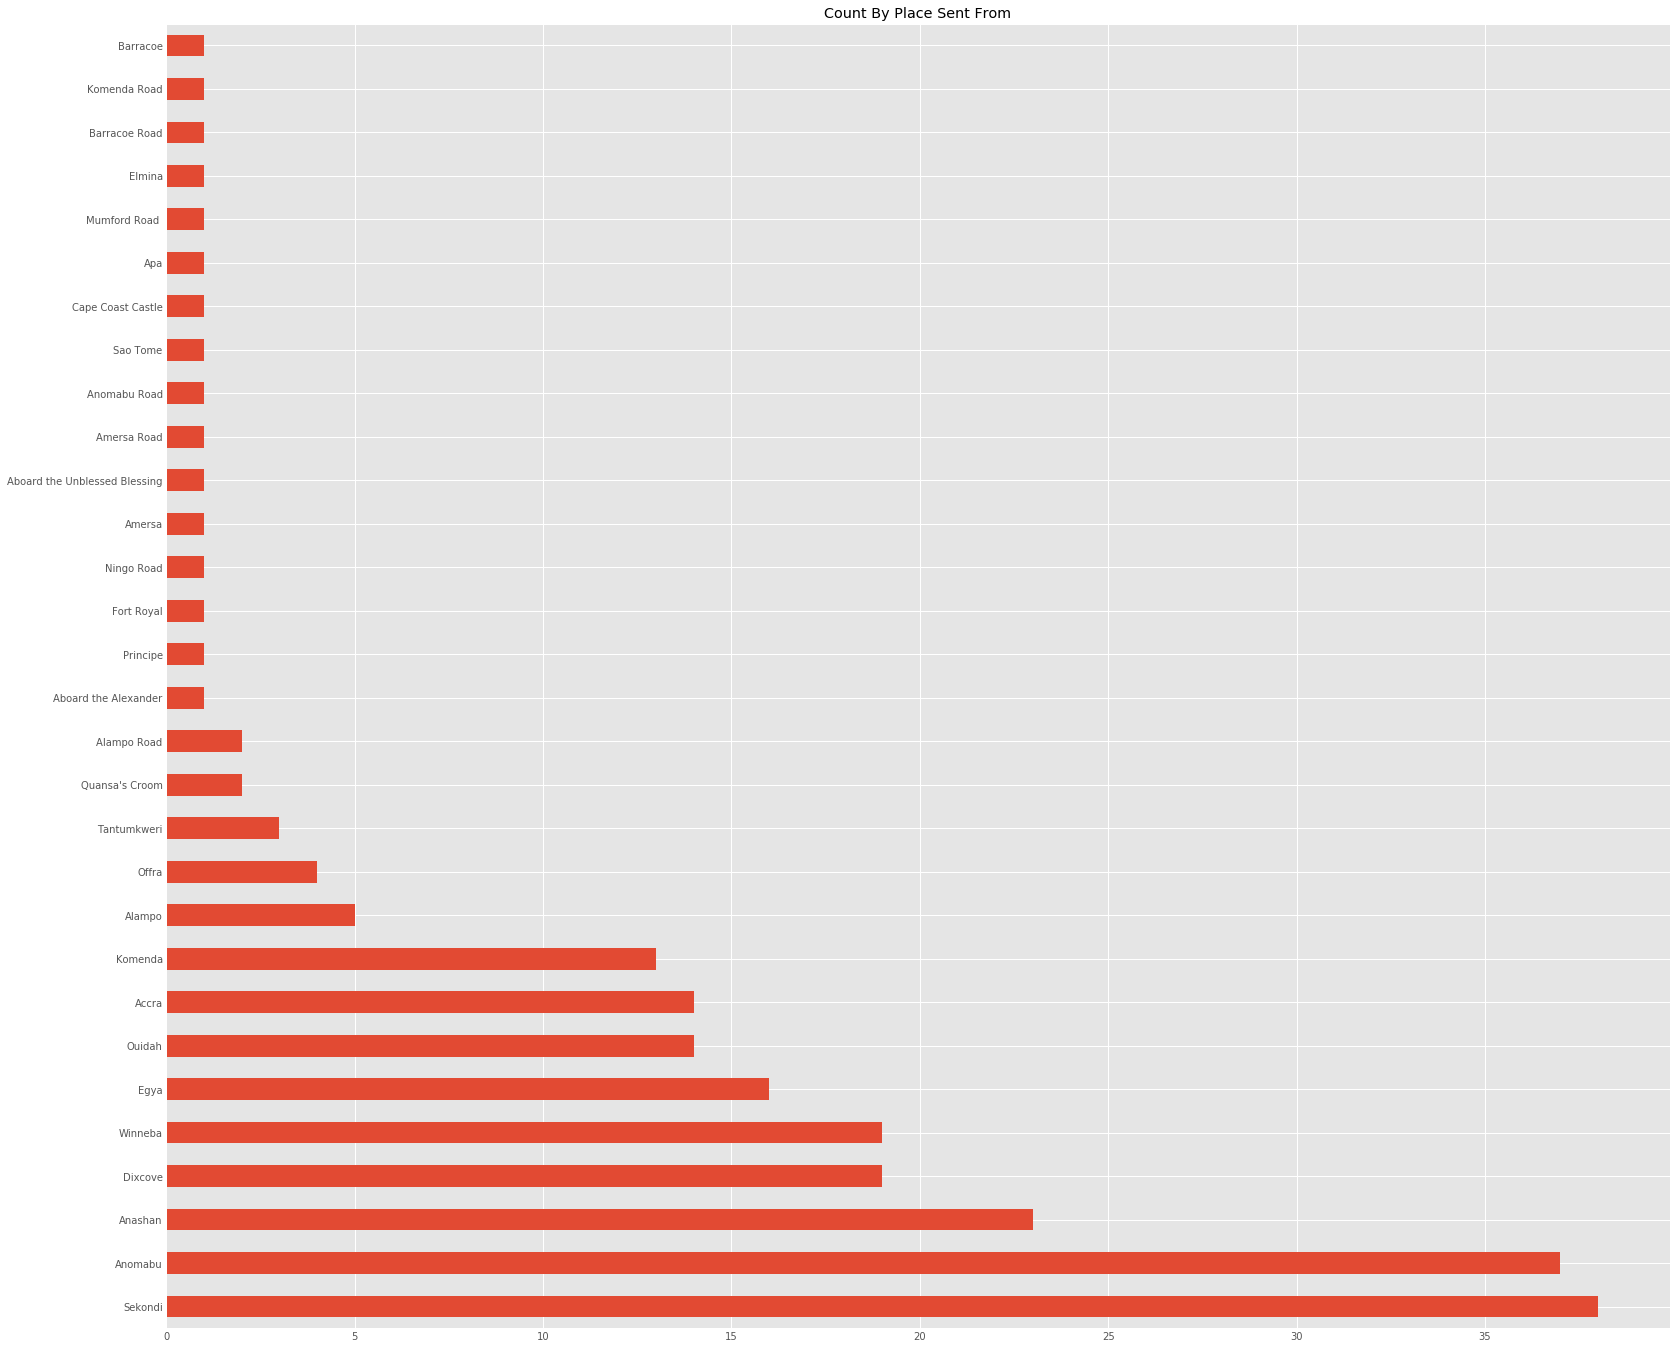

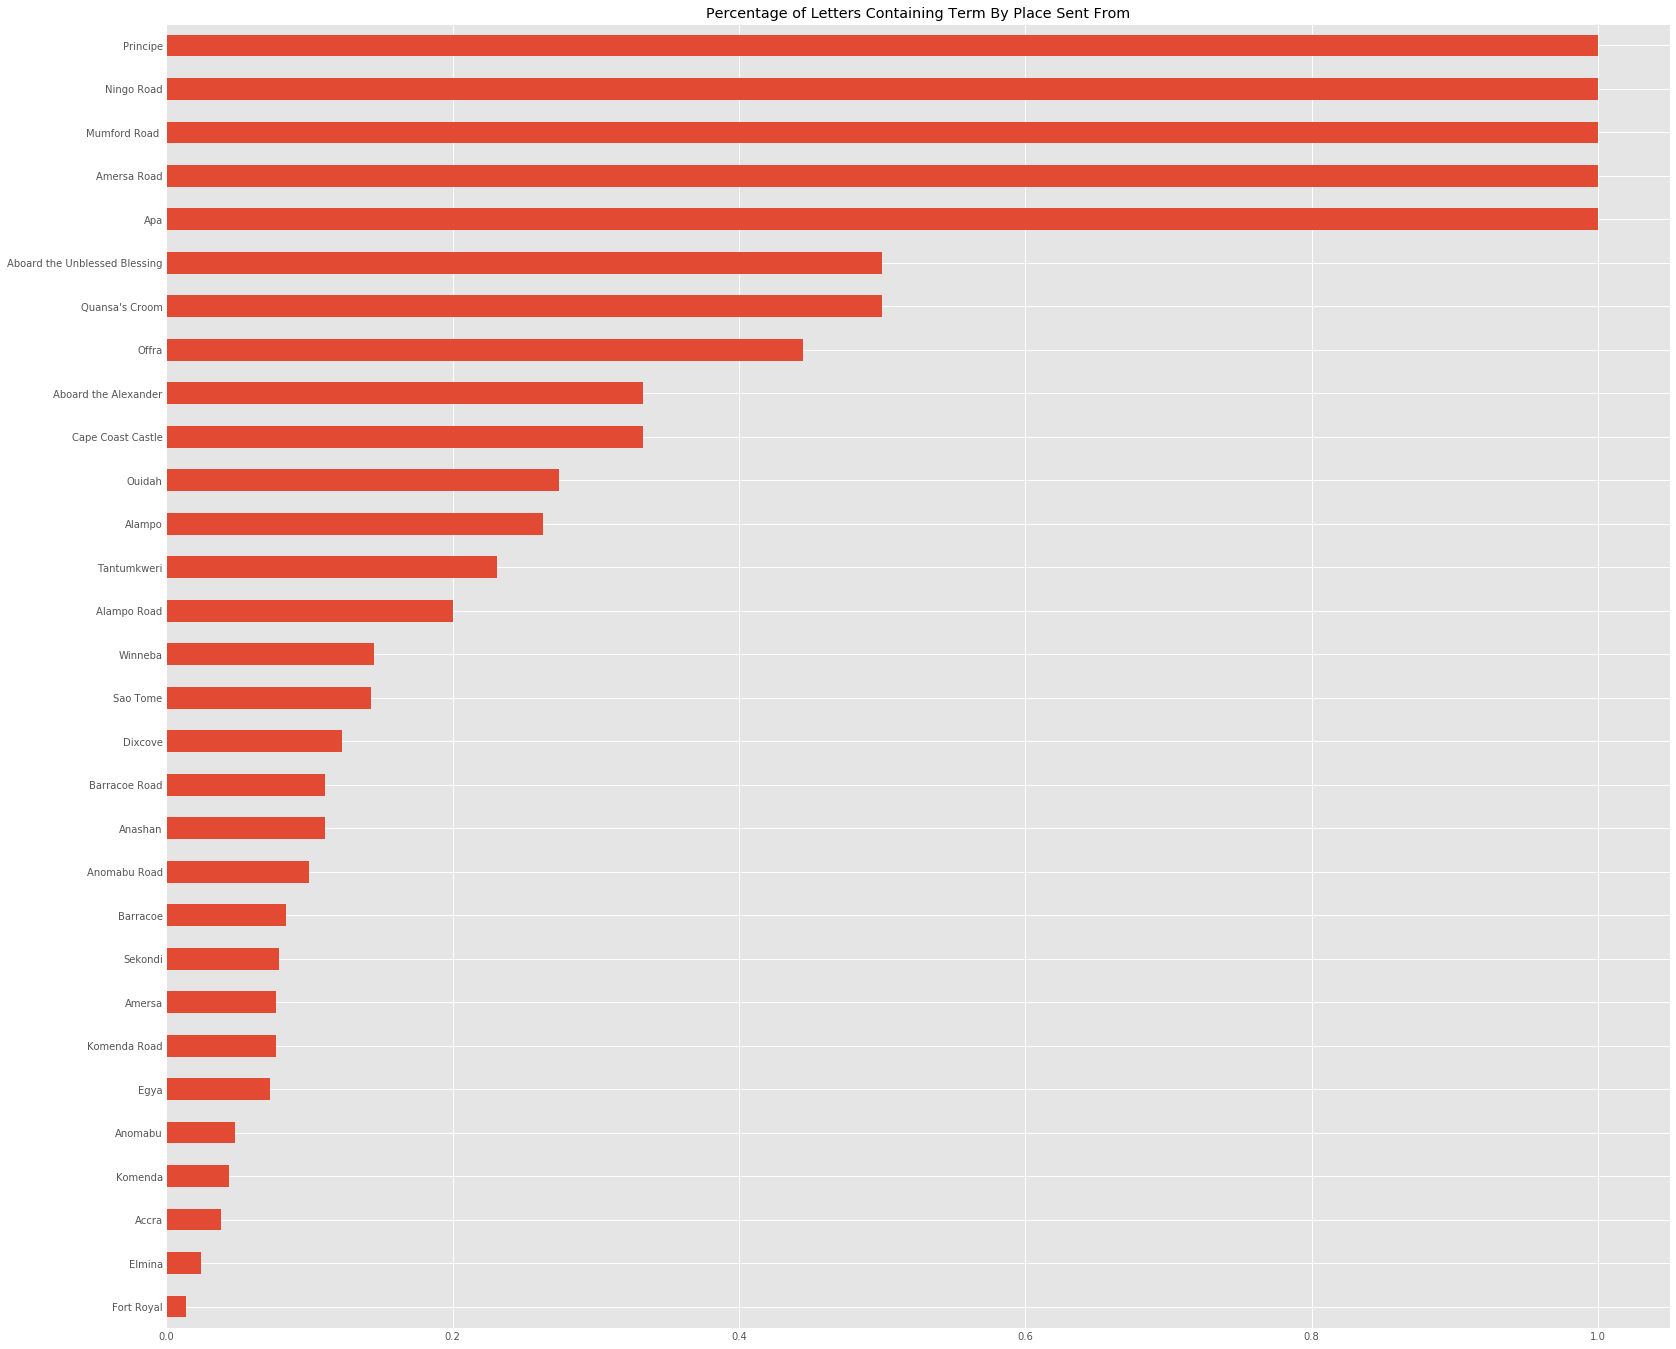

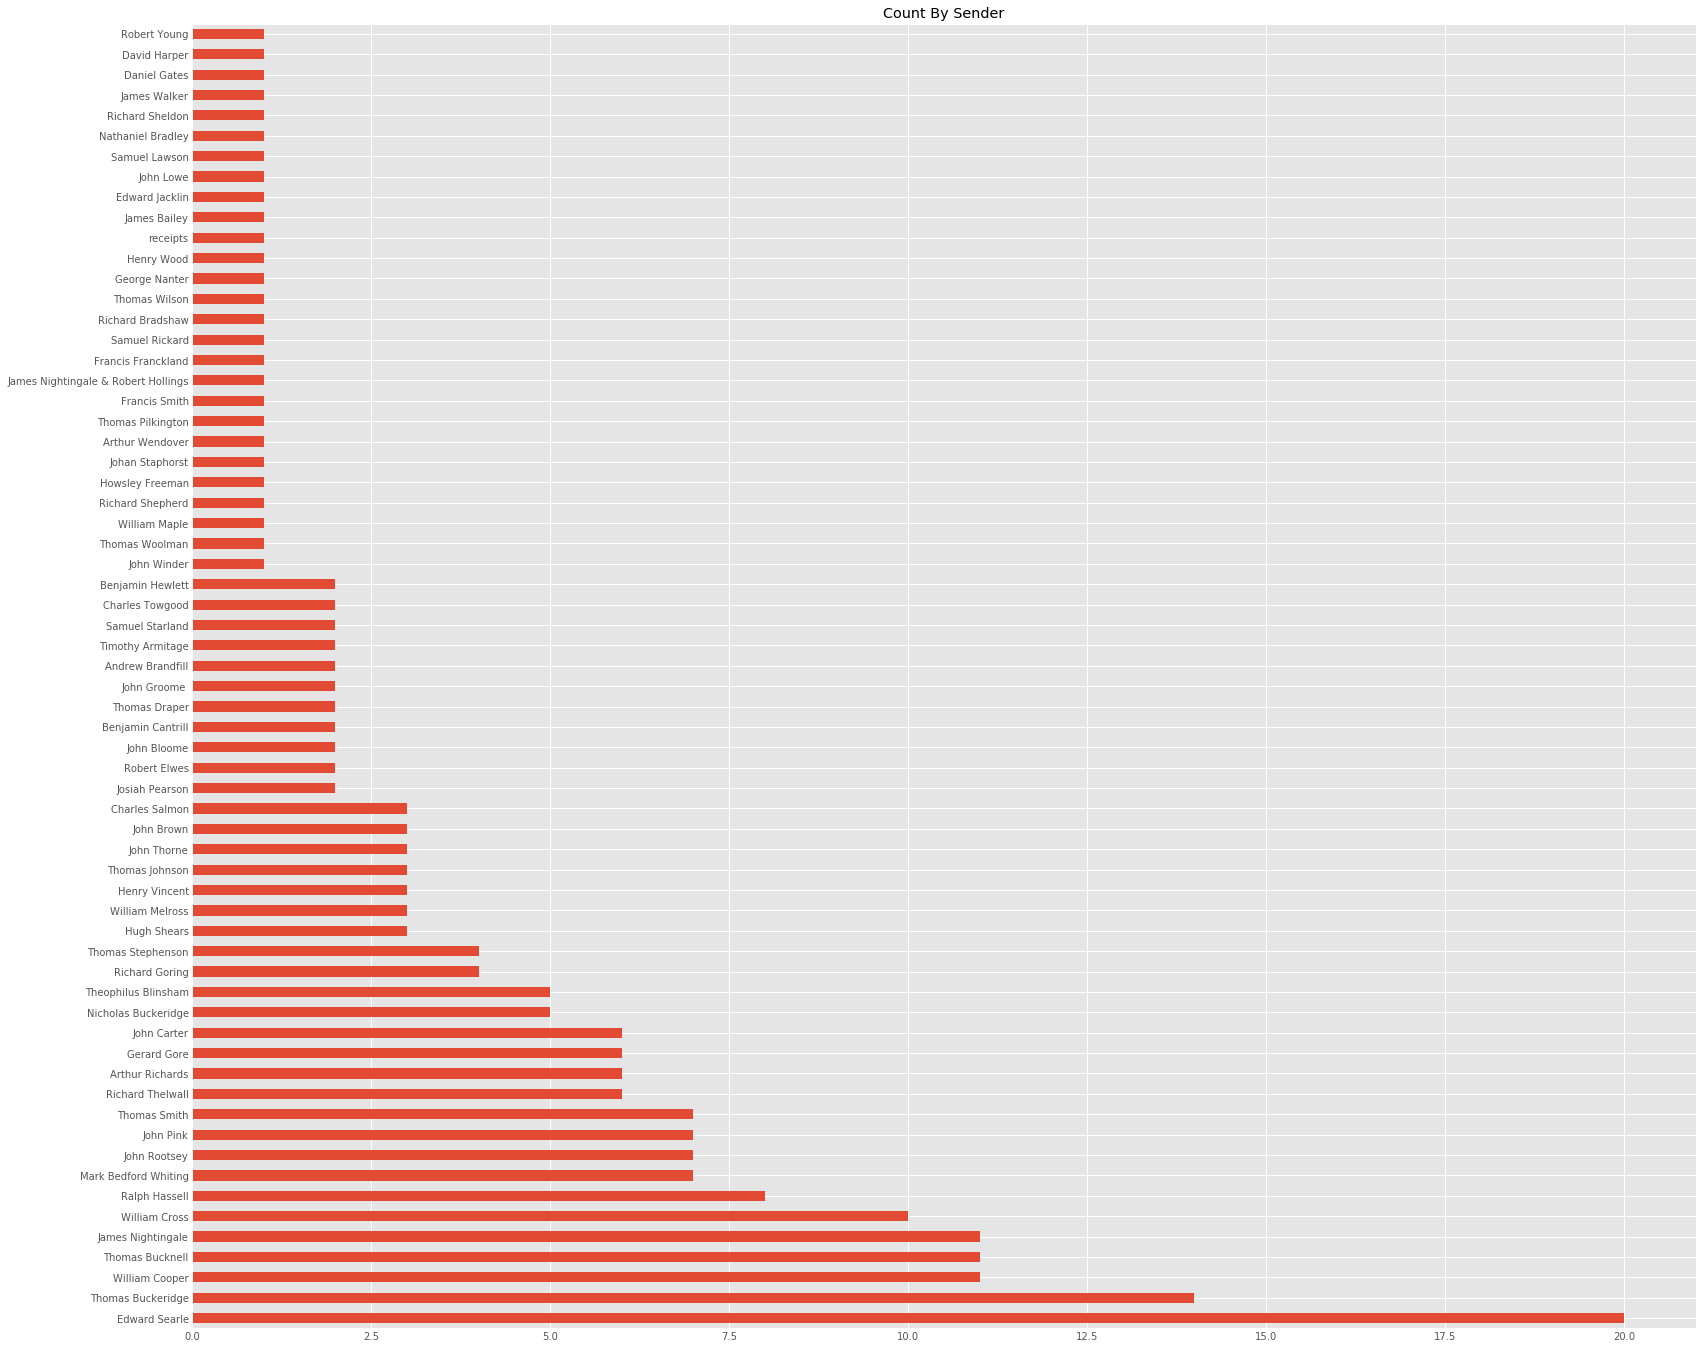

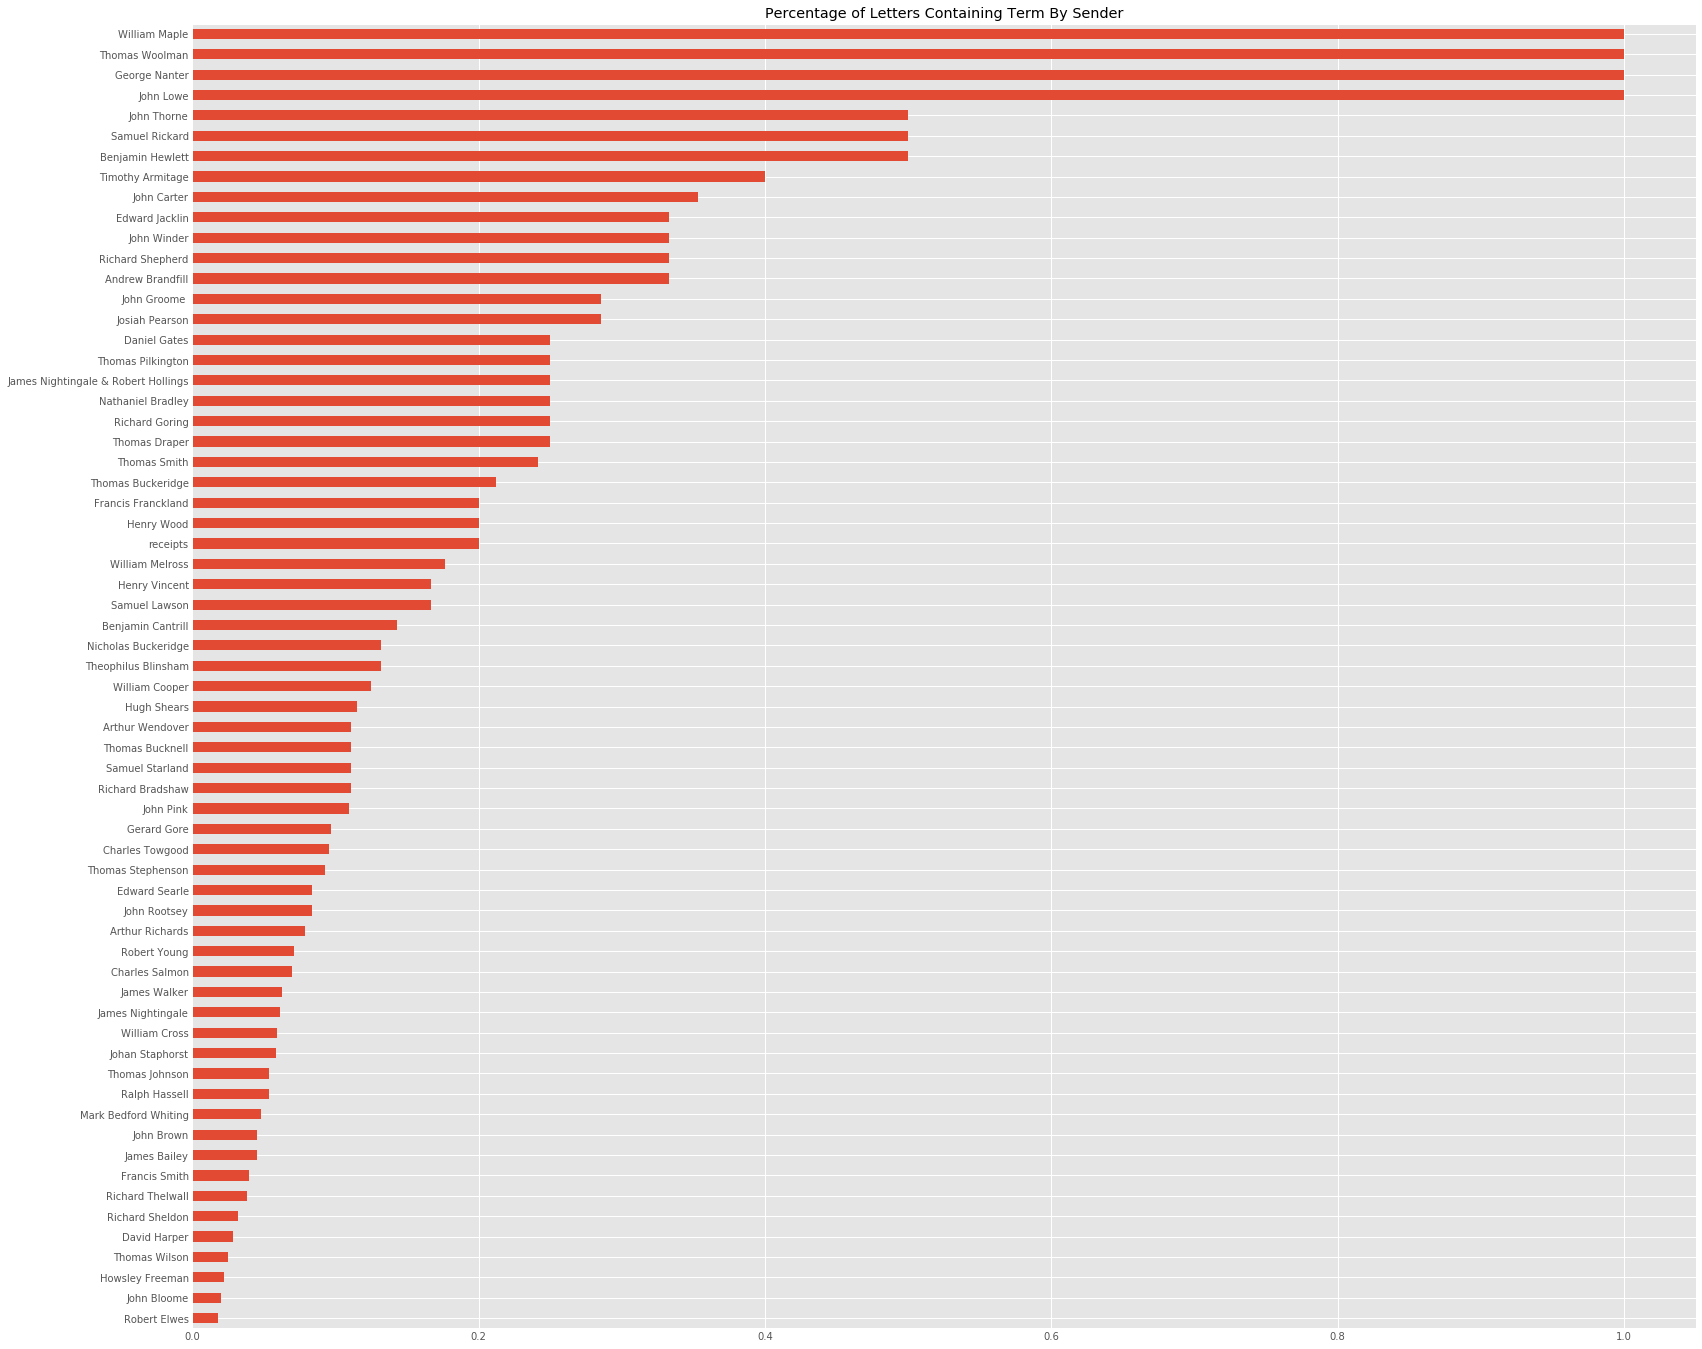

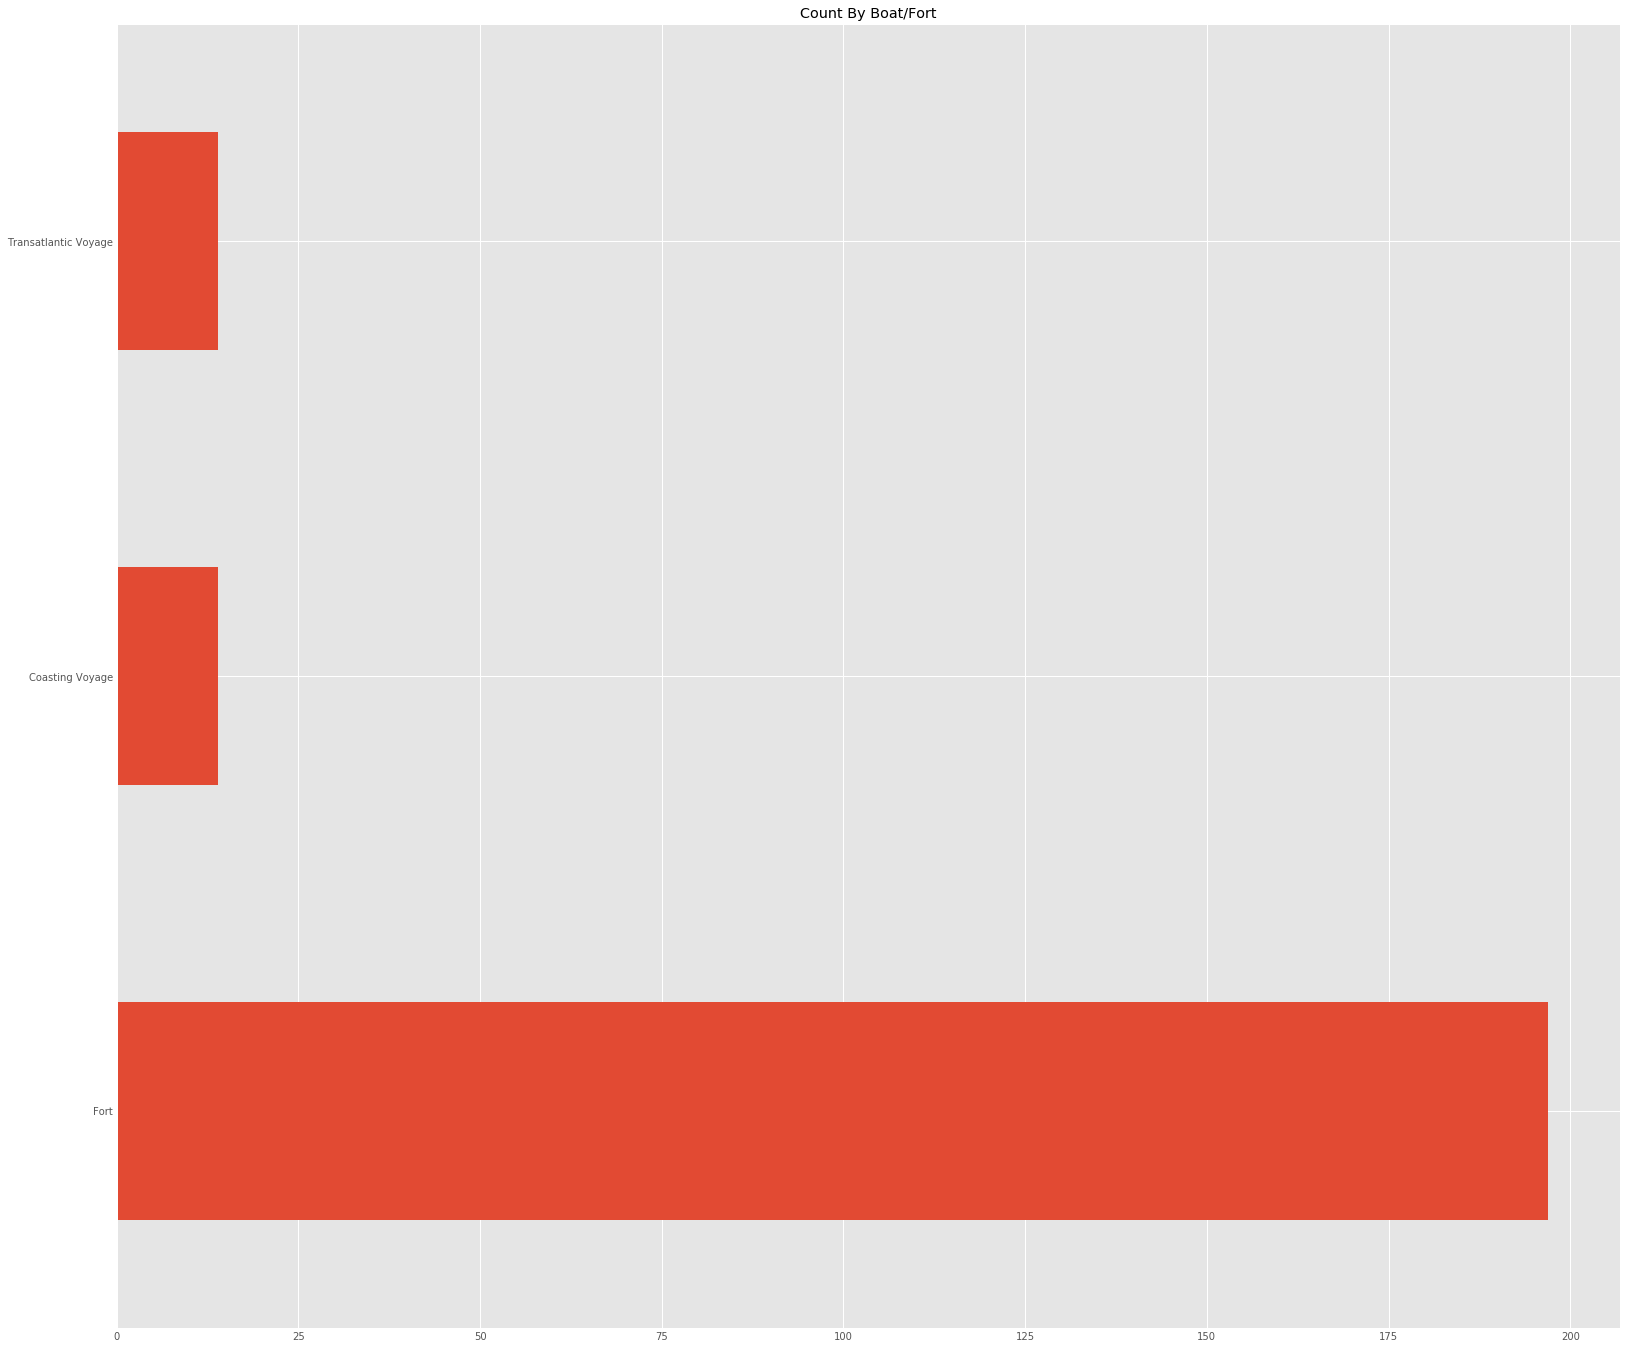

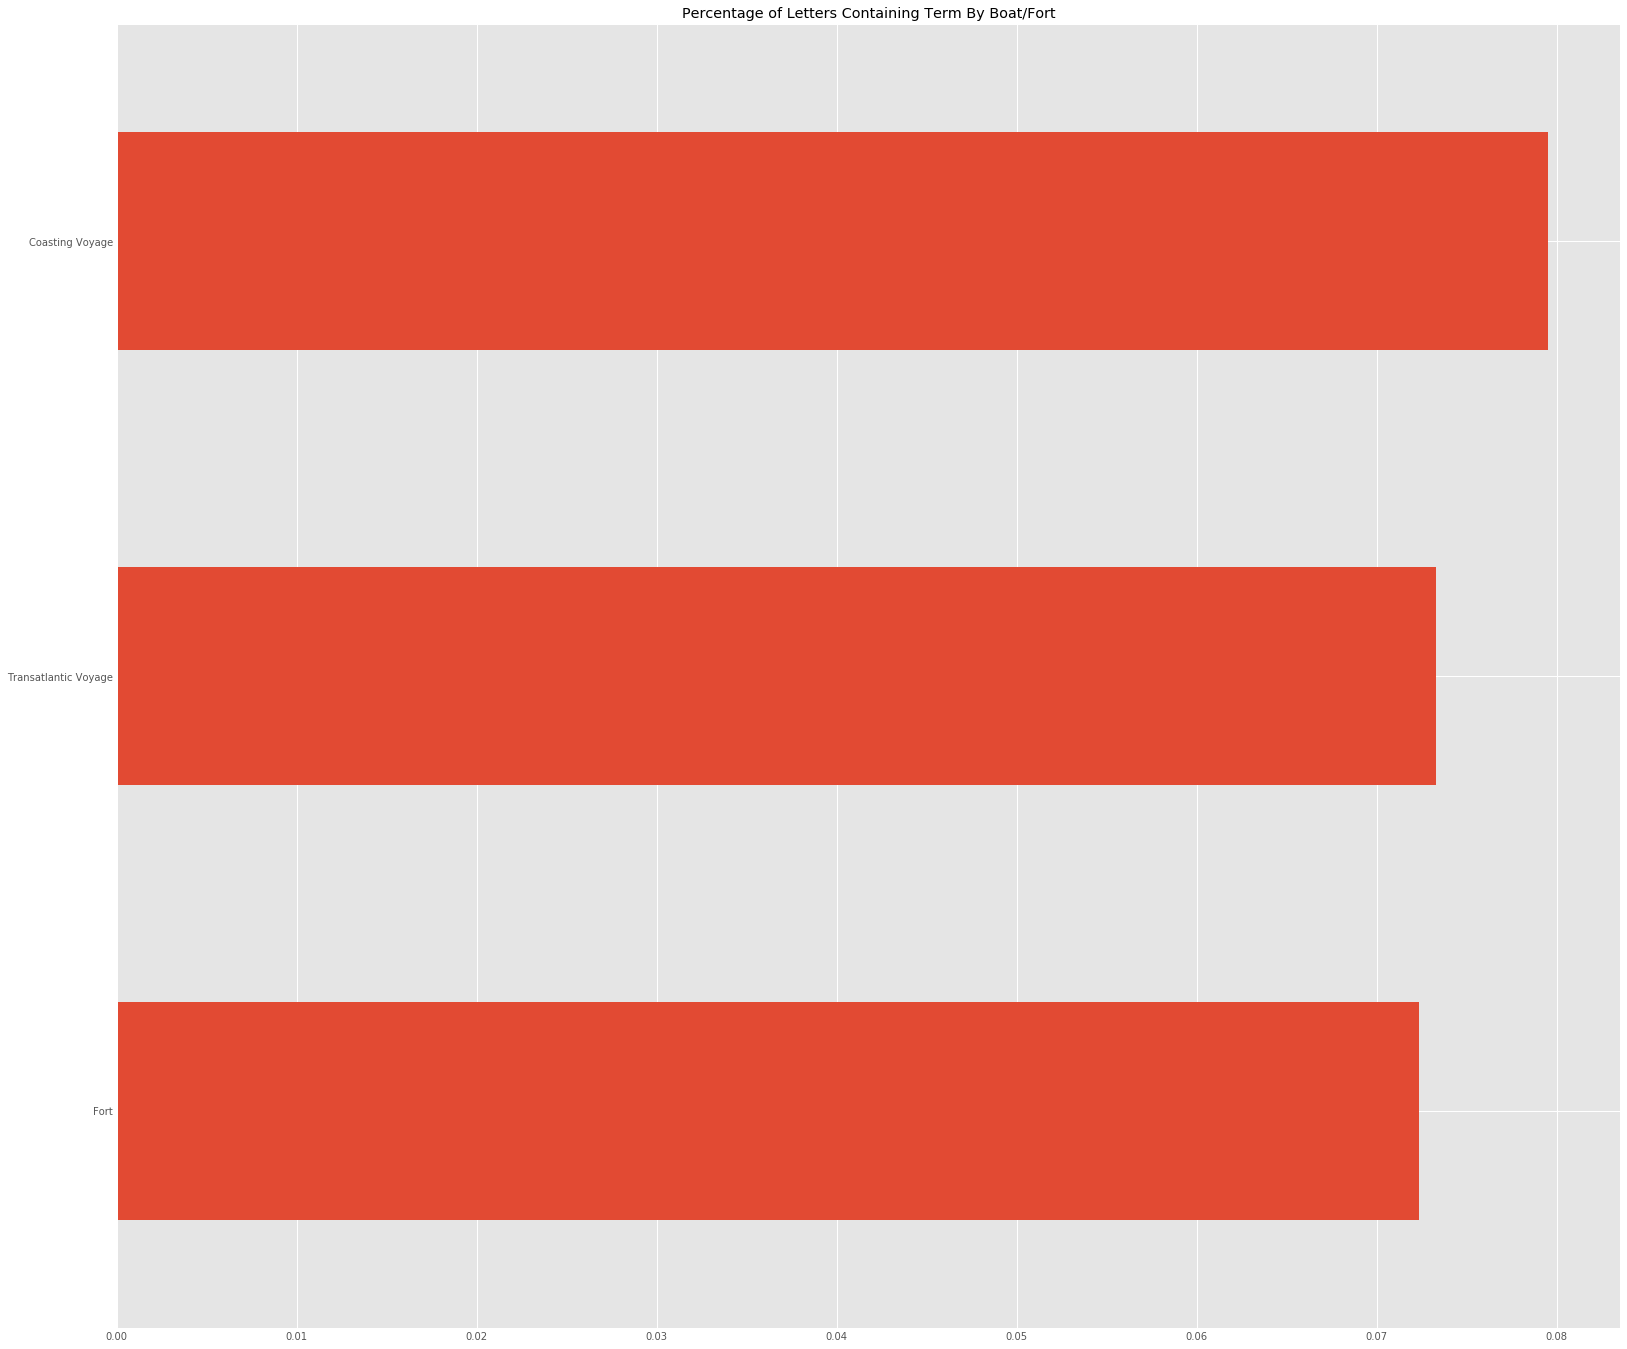

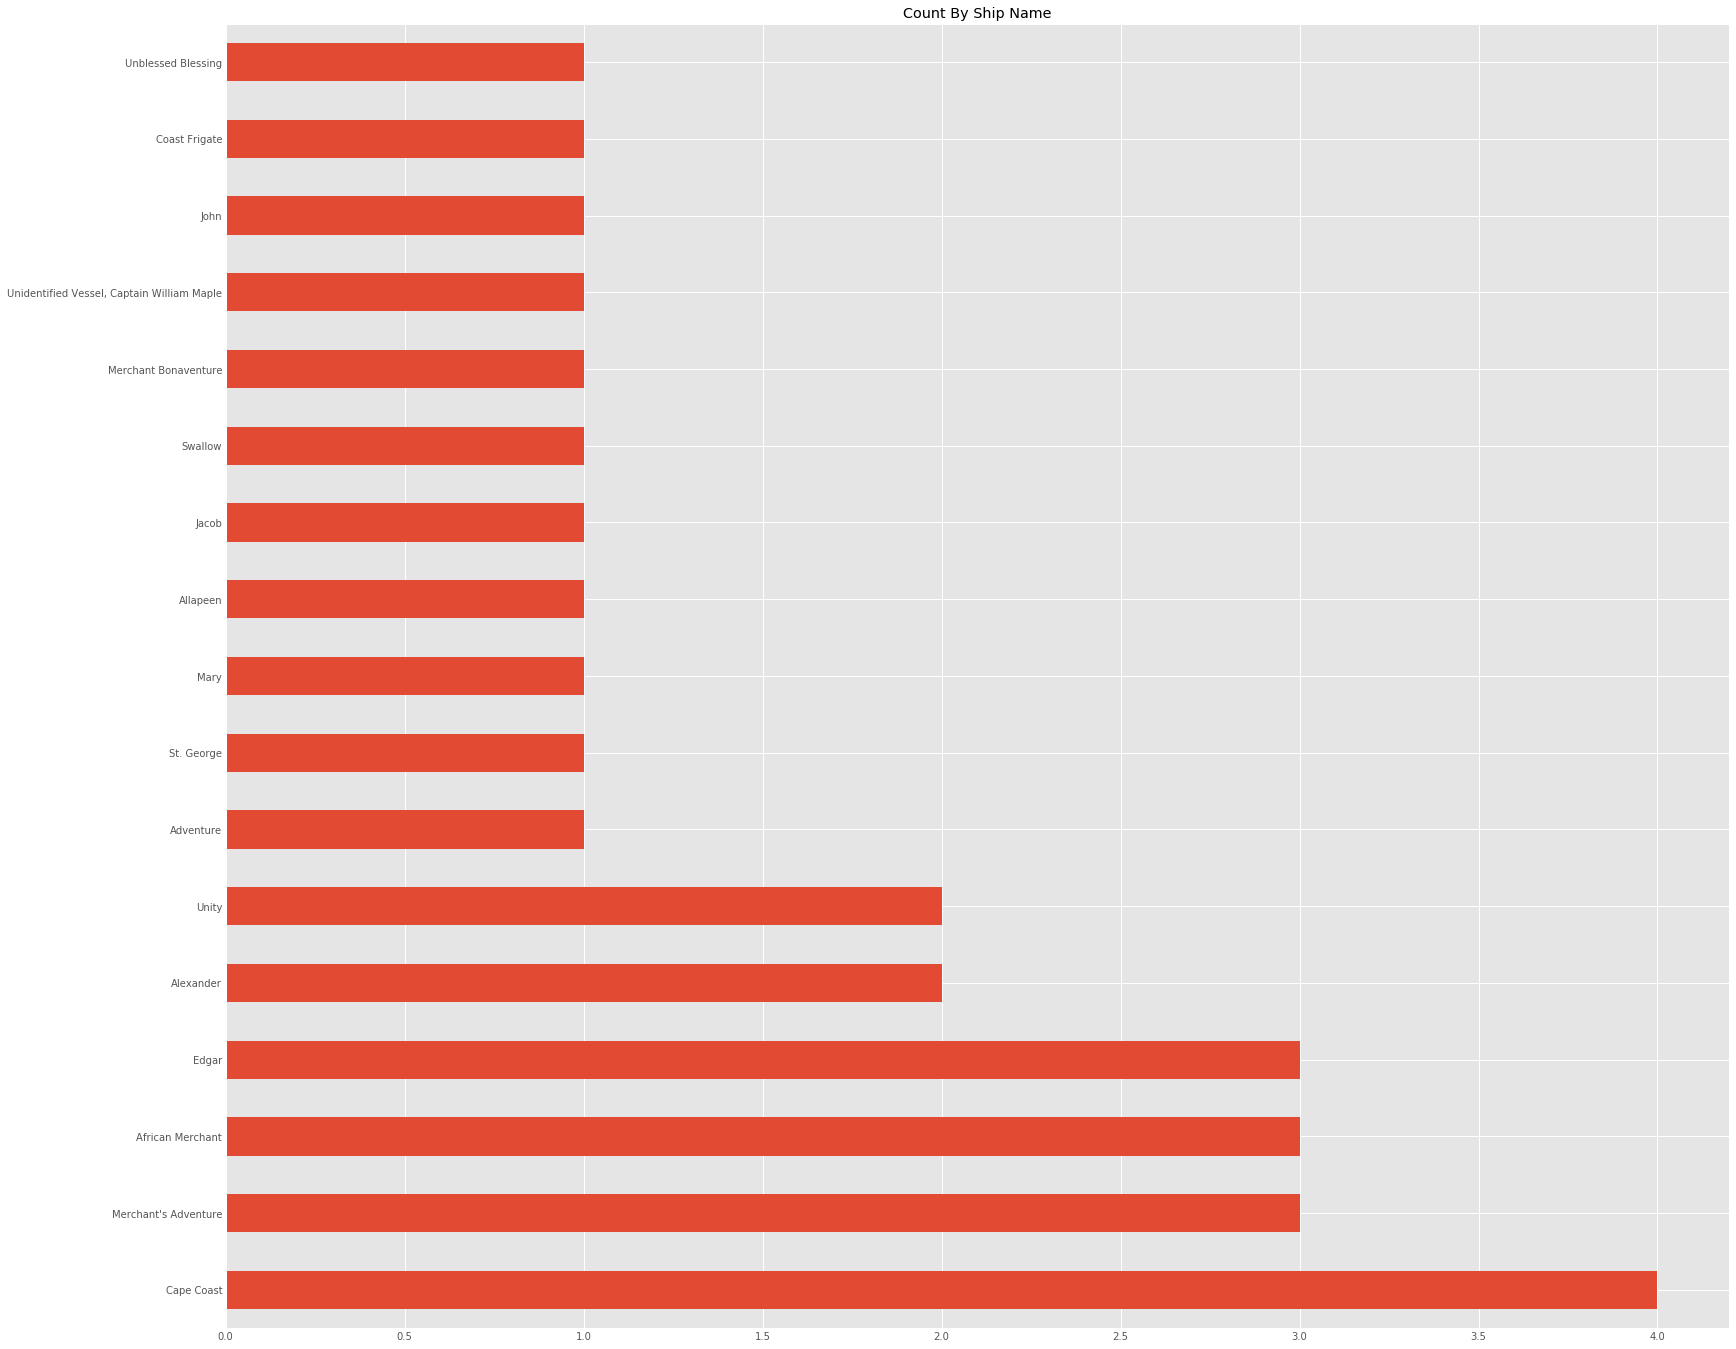

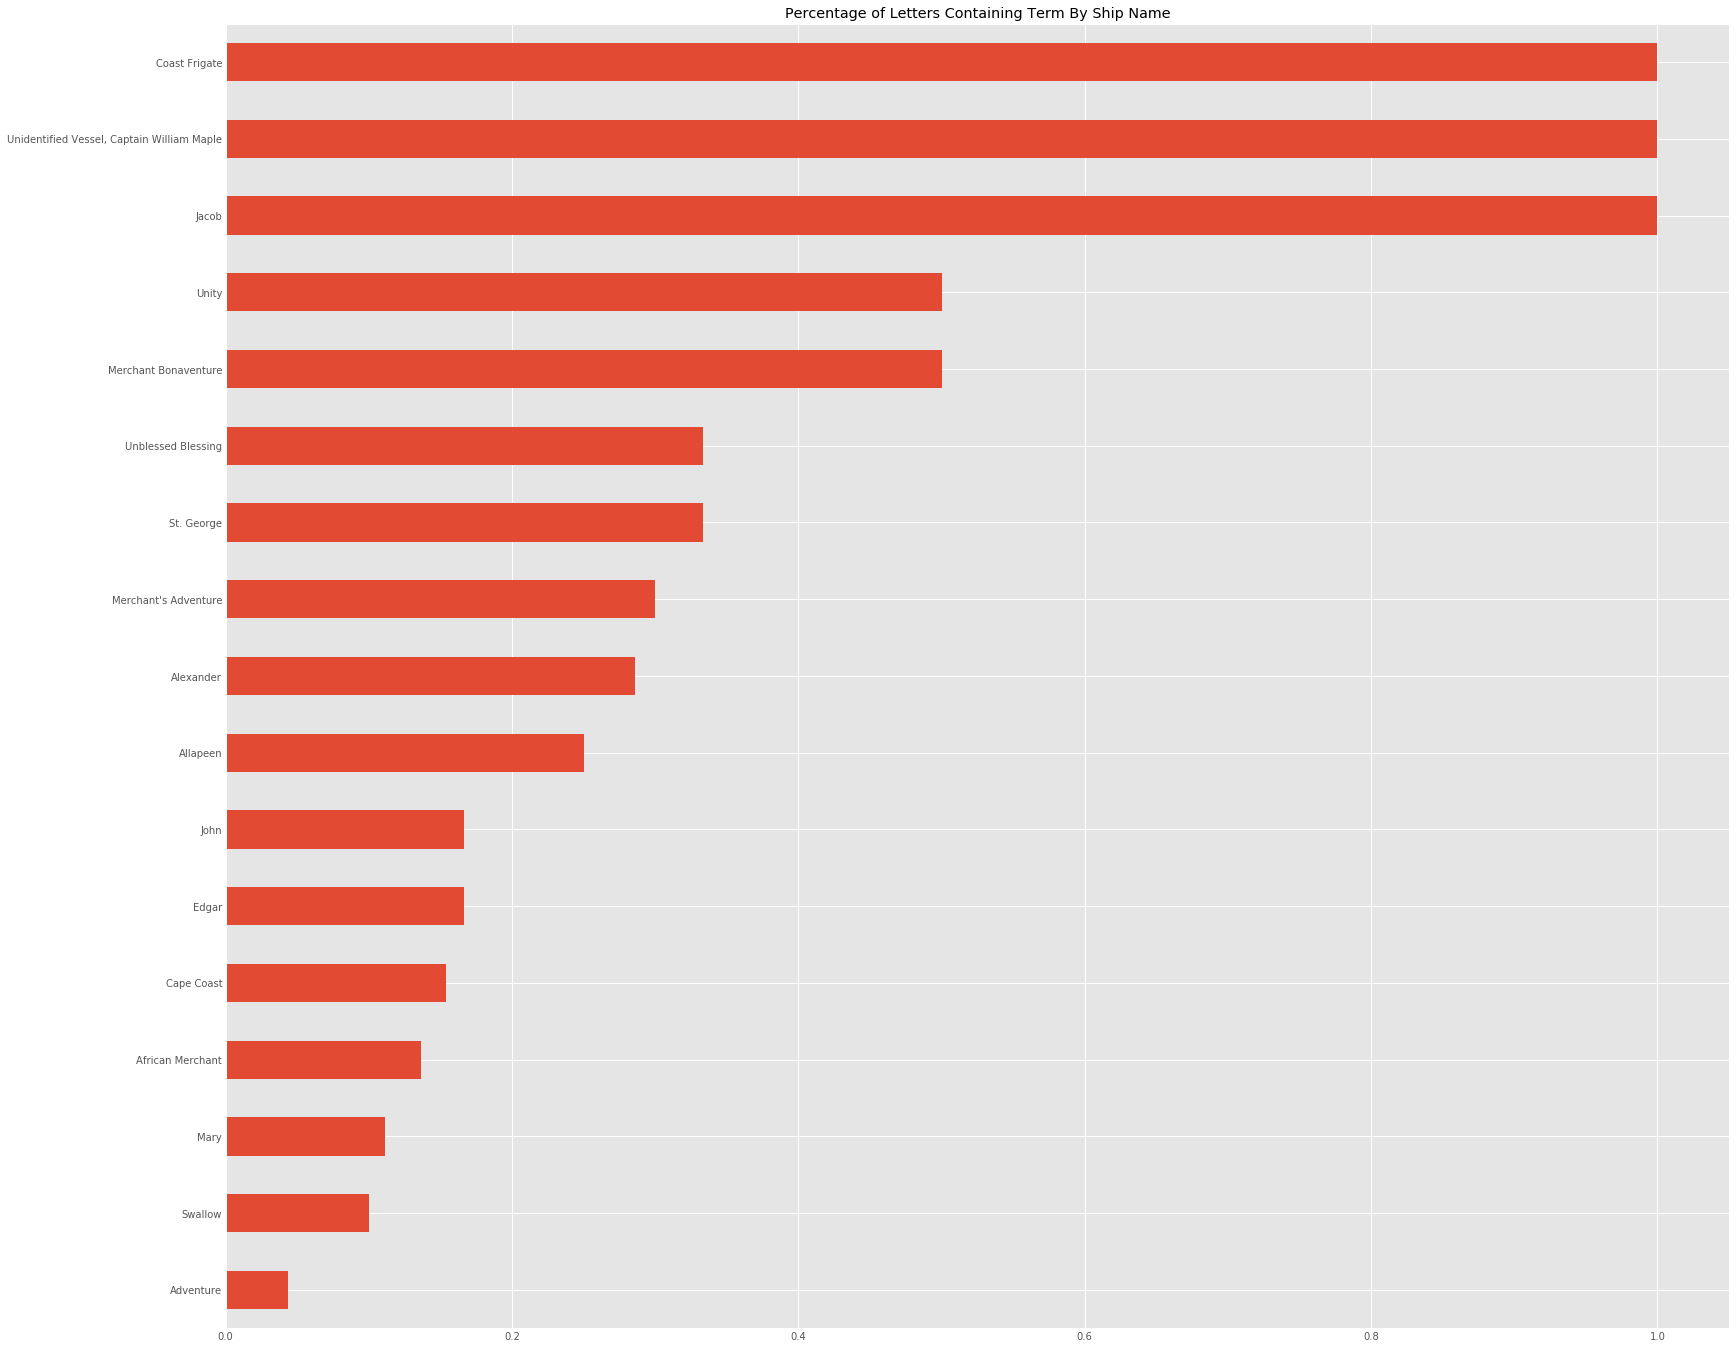

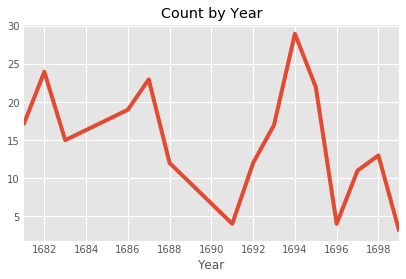

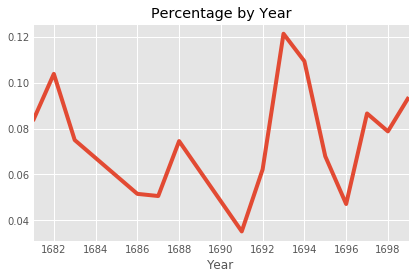

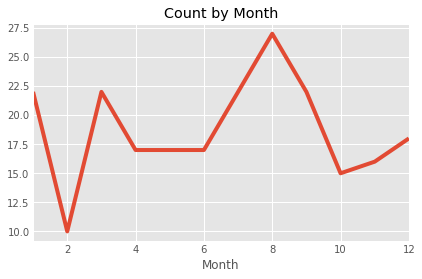

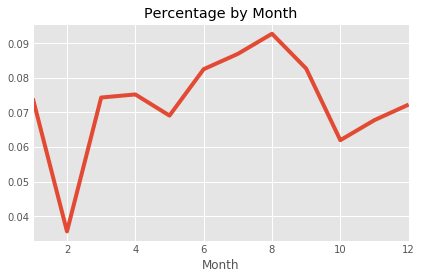

In [73]:
# Modify the terms within the brackets below to modify search. Terms need to be wrapped in parentheses and comma separated.
# The square brackets should be left unchanged.
terms = ['slave']


# DO NOT CHANGE ANYTHING BELOW!!!
def return_terms_found(text, terms):
    for term in terms:
        if term in text.split(' '):
            return True
    
    return False

df['filtered'] = df['text_cleaned_dealiased'].apply(return_terms_found, args=(terms,))

df_subset = df[df['filtered'] == True]

print('Filtering for term:', terms, '({} total letters)'.format(len(df_subset)))

print('First 5 rows of filtered dataframe:')
display(df_subset.head())

print('UIDs of letters containing the term:')
print(df_subset['UID'].values)

for column in ['Place Sent From', 'Sender', 'Boat/Fort', 'Ship Name']:
    try:
        plt.figure(figsize=(24, 24))
        df_subset[column].value_counts().plot(kind='barh', title='Count By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    try:
        plt.figure(figsize=(24, 24))
        (df_subset[column].value_counts() / df[column].value_counts()).sort_values().dropna().plot(kind='barh', title='Percentage of Letters Containing Term By {}'.format(column))
        plt.figure(figsize=(24, 24))
    except:
        print('ERROR: All metadata for this column are null')

plt.figure()
plt.title('Count by Year')
df_subset.groupby('Year').count()['UID'].plot()

plt.figure()
plt.title('Percentage by Year')
(df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna().plot()

plt.figure()
plt.title('Count by Month')
df_subset.groupby('Month').count()['UID'].plot()

plt.figure()
plt.title('Percentage by Month')
(df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna().plot()